In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv(r'C:\Users\katec\Thinkful\chap_4_assignment\data\Directory_Of_Homeless_Population_By_Year.csv')

In [21]:
df.head(10)

,Year,Area,Homeless Estimates
0,2012,Surface Area - Manhattan,906
1,2012,Total Unsheltered Individuals,3262
2,2012,Subways,1634
3,2012,Surface Total,1628
4,2012,Surface Area - Staten Island,99
5,2012,Surface Area - Queens,86
6,2012,Surface Area - Brooklyn,368
7,2012,Surface Area - Bronx,169
8,2011,Surface Area - Manhattan,786
9,2011,Surface Area - Bronx,115


In [22]:
df.Area.unique()

array(['Surface Area - Manhattan ', 'Total Unsheltered Individuals ',
       'Subways ', 'Surface Total ', 'Surface Area - Staten Island ',
       'Surface Area - Queens ', 'Surface Area - Brooklyn ',
       'Surface Area - Bronx '], dtype=object)

Sorting df by Area

In [23]:
df['order'] = df['Area'].map({'Surface Area - Brooklyn ': 0, 'Surface Area - Bronx ': 1, 'Surface Area - Manhattan ': 2, 'Surface Area - Staten Island ': 3, 'Surface Area - Queens ': 4, 'Surface Total ': 5, 'Subways ': 6, 'Total Unsheltered Individuals ': 7})

In [24]:
df.head(15)

,Year,Area,Homeless Estimates,order
0,2012,Surface Area - Manhattan,906,2
1,2012,Total Unsheltered Individuals,3262,7
2,2012,Subways,1634,6
3,2012,Surface Total,1628,5
4,2012,Surface Area - Staten Island,99,3
5,2012,Surface Area - Queens,86,4
6,2012,Surface Area - Brooklyn,368,0
7,2012,Surface Area - Bronx,169,1
8,2011,Surface Area - Manhattan,786,2
9,2011,Surface Area - Bronx,115,1


In [56]:
df.sort_values('order', ascending = True, inplace= True)

In [39]:
df.head(15)

,Year,Area,Homeless Estimates,order
19,2010,Surface Area - Brooklyn,428,0
30,2009,Surface Area - Brooklyn,200,0
6,2012,Surface Area - Brooklyn,368,0
10,2011,Surface Area - Brooklyn,242,0
31,2009,Surface Area - Bronx,164,1
18,2010,Surface Area - Bronx,174,1
7,2012,Surface Area - Bronx,169,1
9,2011,Surface Area - Bronx,115,1
24,2009,Surface Area - Manhattan,777,2
17,2010,Surface Area - Manhattan,1145,2


Plot 2: New York City Homeless Population by Year across Borough (4 plots)

first attempt: working with complete, sorted df - unsure how to add title (year) to each subplot

#example of how to color the bars
plt.bar(y_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(y_pos, bars)
plt.show()

<Figure size 432x288 with 0 Axes>

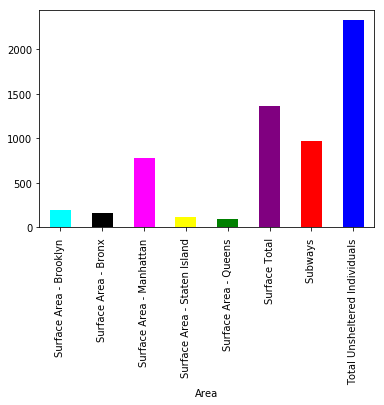

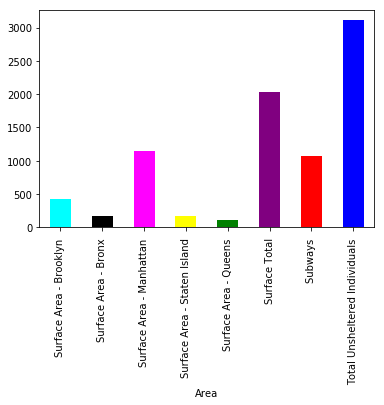

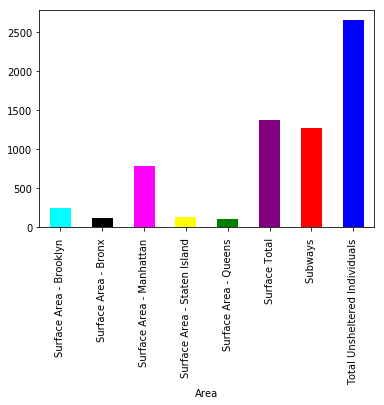

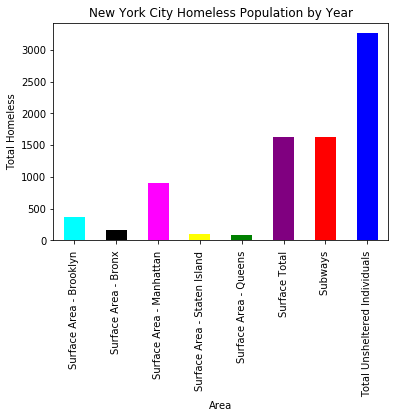

In [69]:
fig = plt.figure()
color = ['cyan', 'black', 'magenta', 'yellow', 'green', 'purple', 'red', 'blue']
df.groupby('Year').plot(kind= 'bar', x = 'Area',y = 'Homeless Estimates', color = color, legend = None)
plt.ylabel('Total Homeless')
plt.title('New York City Homeless Population by Year')

plt.show()

attempt 2: working with complete, sorted df - unsure how to add title (year) to each subplot & remove "Homeless Estimates from title/top

<function matplotlib.pyplot.title(label, fontdict=None, loc='center', pad=None, **kwargs)>

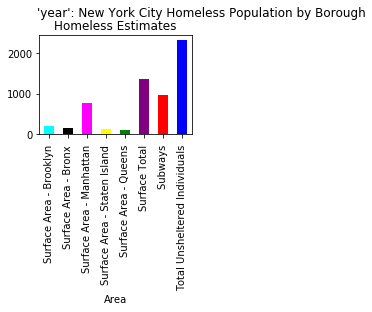

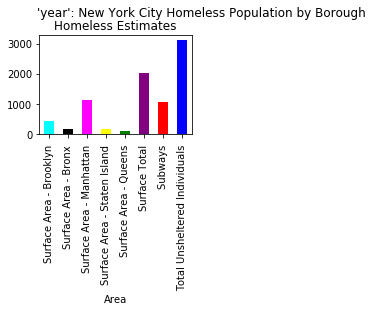

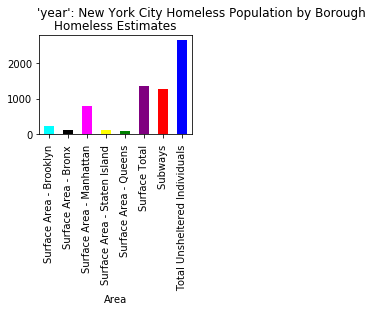

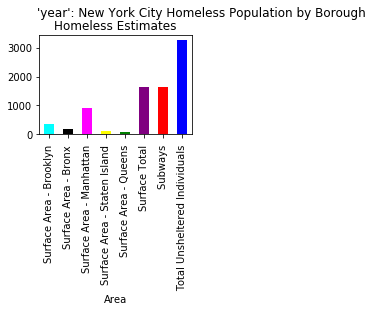

In [76]:
color = ['cyan', 'black', 'magenta', 'yellow', 'green', 'purple', 'red', 'blue']
df.groupby('Year').plot(kind= 'bar', x = 'Area',y = 'Homeless Estimates', color = color, title= ("'year': New York City Homeless Population by Borough"),legend=None, subplots=True, layout=(2,2))
plt.title 

attempt 3: working with complete, sorted df - unsure how to add title (year) to each subplot and fix spacing

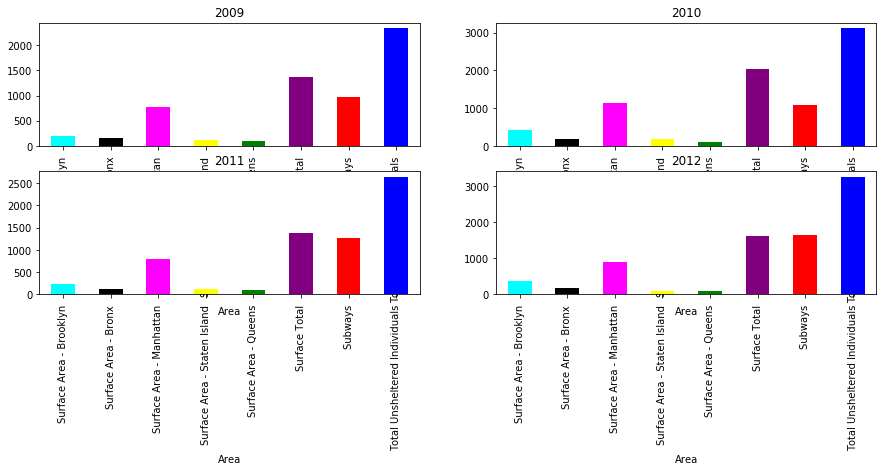

In [80]:
fig, axes = plt.subplots(2,2, figsize=(15,5))
color = ['cyan', 'black', 'magenta', 'yellow', 'green', 'purple', 'red', 'blue']
for (year, group), ax in zip(df.groupby('Year'), axes.flatten()):
    group.plot(x='Area', y='Homeless Estimates', kind='bar', color = color, legend=None, ax=ax, title= year)

attempt 4: working with sliced df (by year): fix y-ticks to be more specific?

In [57]:
df_2009 = df[df['Year'] == 2009]
df_2010 = df[df['Year'] == 2010]
df_2011 = df[df['Year'] == 2011]
df_2012 = df[df['Year'] == 2012]

In [59]:
type(df_2009)

pandas.core.frame.DataFrame

In [58]:
df_2009.head

<bound method NDFrame.head of     Year                            Area  Homeless Estimates  order
30  2009        Surface Area - Brooklyn                  200      0
31  2009           Surface Area - Bronx                  164      1
24  2009       Surface Area - Manhattan                  777      2
28  2009   Surface Area - Staten Island                  121      3
29  2009          Surface Area - Queens                   98      4
27  2009                  Surface Total                 1360      5
26  2009                        Subways                  968      6
25  2009  Total Unsheltered Individuals                 2328      7>

<Figure size 432x288 with 0 Axes>

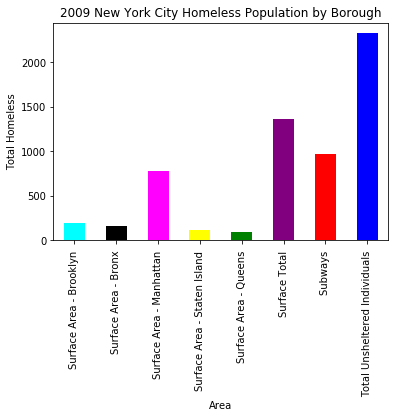

In [66]:
fig = plt.figure()
color = ['cyan', 'black', 'magenta', 'yellow', 'green', 'purple', 'red', 'blue']
df_2009.plot(kind = 'bar', x = 'Area',y = 'Homeless Estimates', color = color, legend = None)
plt.ylabel('Total Homeless')
plt.title('2009 New York City Homeless Population by Borough')

plt.show()

<Figure size 432x288 with 0 Axes>

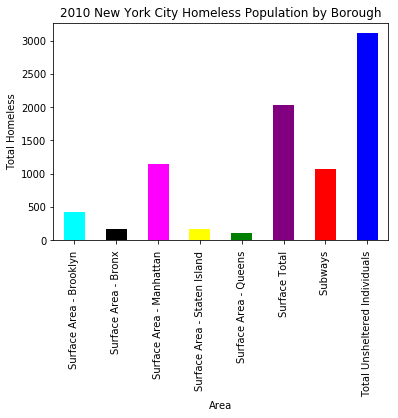

In [77]:
fig = plt.figure()
color = ['cyan', 'black', 'magenta', 'yellow', 'green', 'purple', 'red', 'blue']
df_2010.plot(kind = 'bar', x = 'Area',y = 'Homeless Estimates', color = color, legend = None)
plt.ylabel('Total Homeless')
plt.title('2010 New York City Homeless Population by Borough')

plt.show()

<Figure size 432x288 with 0 Axes>

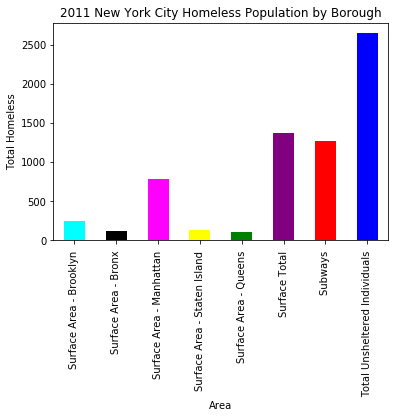

In [78]:
fig = plt.figure()
color = ['cyan', 'black', 'magenta', 'yellow', 'green', 'purple', 'red', 'blue']
df_2011.plot(kind = 'bar', x = 'Area',y = 'Homeless Estimates', color = color, legend = None)
plt.ylabel('Total Homeless')
plt.title('2011 New York City Homeless Population by Borough')

plt.show()

<Figure size 432x288 with 0 Axes>

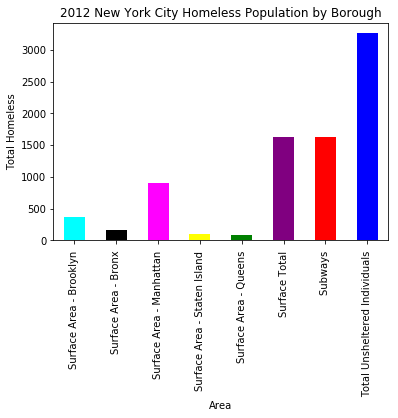

In [79]:
fig = plt.figure()
color = ['cyan', 'black', 'magenta', 'yellow', 'green', 'purple', 'red', 'blue']
df_2012.plot(kind = 'bar', x = 'Area',y = 'Homeless Estimates', color = color, legend = None)
plt.ylabel('Total Homeless')
plt.title('2012 New York City Homeless Population by Borough')

plt.show()

Plot 2 Trends: 
    > The homeless population in each borough appears to be relativley consistent over a 4-year period.
    > The areas with the highest homeless populations are clearly the Subways and Manhattan, followed by Brooklyn. 
    The remaining areas appear to have a significantly lower homeless population, perhaps a reflection of lower 
    overall population?
    > The incidence of homeless in the Subways is most interesting, as it is much less visible to a casual observer. 
    > The trend appears to show a decrease for each area in year 2011, before increasing to its highest point in 2012.
    > Recommend further investigation into cause related to decrease in 2011. 

In [45]:
groupby_area = df['Homeless Estimates'].groupby(df['Area'])
list(groupby_area)

[('Subways ', 2     1634
  23    1077
  26     968
  14    1275
  Name: Homeless Estimates, dtype: int64), ('Surface Area - Bronx ', 31    164
  18    174
  7     169
  9     115
  Name: Homeless Estimates, dtype: int64), ('Surface Area - Brooklyn ',
  19    428
  30    200
  6     368
  10    242
  Name: Homeless Estimates, dtype: int64), ('Surface Area - Manhattan ',
  24     777
  17    1145
  0      906
  8      786
  Name: Homeless Estimates, dtype: int64), ('Surface Area - Queens ', 29     98
  20    112
  11    102
  5      86
  Name: Homeless Estimates, dtype: int64), ('Surface Area - Staten Island ',
  21    175
  12    128
  28    121
  4      99
  Name: Homeless Estimates, dtype: int64), ('Surface Total ', 27    1360
  22    2034
  3     1628
  13    1373
  Name: Homeless Estimates, dtype: int64), ('Total Unsheltered Individuals ',
  1     3262
  25    2328
  16    3111
  15    2648
  Name: Homeless Estimates, dtype: int64)]

In [46]:
df['Homeless Estimates'].groupby(df['Area']).describe()

,count,mean,std,min,25%,50%,75%,max
Area,,,,,,,,
Subways,4.0,1238.50,292.691533,968.0,1049.75,1176.0,1364.75,1634.0
Surface Area - Bronx,4.0,155.50,27.306898,115.0,151.75,166.5,170.25,174.0
Surface Area - Brooklyn,4.0,309.50,106.475349,200.0,231.50,305.0,383.00,428.0
Surface Area - Manhattan,4.0,903.50,171.403034,777.0,783.75,846.0,965.75,1145.0
Surface Area - Queens,4.0,99.50,10.754844,86.0,95.00,100.0,104.50,112.0
Surface Area - Staten Island,4.0,130.75,31.983068,99.0,115.50,124.5,139.75,175.0
Surface Total,4.0,1598.75,315.310825,1360.0,1369.75,1500.5,1729.50,2034.0
Total Unsheltered Individuals,4.0,2837.25,428.370070,2328.0,2568.00,2879.5,3148.75,3262.0


# Create a groupby variable that groups preTestScores by regiment
groupby_regiment = df['preTestScore'].groupby(df['regiment'])
groupby_regiment

#describe() gives basic stastical analysis
df['preTestScore'].groupby(df['regiment']).describe()